In [1]:
import pandas as pd

ae_name = 'vomiting'

df = pd.read_csv(f'data_normalized_{ae_name}.csv')
df

,drug,SMILES,appendix endocrine cells,urinary bladder urothelial cells,colon mucosal lymphoid cells,skeletal muscle myocytes,nasopharynx ciliated cells (ciliary rootlets),skin 2 extracellular matrix,kidney cells in tubules,soft tissue 2 peripheral nerve,...,breast myoepithelial cells,cerebellum synaptic glomeruli - capsule,liver cholangiocytes,bronchus goblet cells,cerebellum processes in white matter,endometrium nonciliated luminal epithelial cells,skin 1 arrector pili muscle cells,endometrium macrophages,appendix germinal center cells,vomiting
0,alfentanil,CCC(=O)N(C1=CC=CC=C1)C2(CCN(CC2)CCN3C(=O)N(N=N...,-1.281711,-1.344452,-1.417408,-1.271576,-0.729839,-1.815646,-1.272832,-1.089551,...,-1.309793,-1.978059,-1.360857,-1.804799,-1.497693,-0.566455,-1.377172,-0.877603,-1.231006,1.0
1,telithromycin,CC[C@@H]1[C@@]2([C@@H]([C@H](C(=O)[C@@H](C[C@@...,-1.636157,-1.695398,-1.527260,-1.747835,-1.102488,-1.308881,-1.689608,-1.608492,...,-1.716730,-1.063150,-1.758736,-2.108237,-1.095858,-0.650134,-2.054320,-0.345030,-1.602758,1.0
2,simeprevir,CC1=C(C=CC2=C1N=C(C=C2O[C@@H]3C[C@@H]4[C@@H](C...,-1.856614,-1.917219,-1.556141,-1.976346,-1.093235,-2.034751,-1.880744,-1.849850,...,-1.931928,-1.805441,-1.986067,-2.480974,-1.673977,-0.003051,-1.940666,0.588296,-1.954260,0.0
3,pentamidine.isethionate,C1=CC(=CC=C1C(=N)N)OCCCCCOC2=CC=C(C=C2)C(=N)N,0.246507,0.415652,0.498205,0.389718,0.187422,0.331414,0.434407,0.365410,...,0.421948,0.124140,0.398677,0.228167,0.120486,0.170857,-0.090287,0.339287,0.354320,0.0
4,penicillamine,CC(C)([C@H](C(=O)O)N)S,0.064900,0.182003,0.085456,0.171662,-0.255581,-0.029656,0.168396,0.157375,...,0.192795,0.364234,0.163682,0.464120,0.173628,0.072737,0.078288,0.200570,0.073908,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,rufinamide,C1=CC(=C(C(=C1)F)CN2C=C(N=N2)C(=O)N)F,0.306728,0.250165,0.204353,0.206894,-0.370267,0.006056,0.224393,0.296833,...,0.267975,0.360453,0.234467,0.091473,0.294345,-0.030332,0.352621,-0.034899,0.335045,1.0
708,tafluprost,CC(C)OC(=O)CCC/C=C\C[C@H]1[C@H](C[C@H]([C@@H]1...,0.998637,0.676855,1.181564,0.658279,1.196368,0.852569,0.717000,0.625282,...,0.646965,-0.076718,0.779227,0.260670,0.360139,0.878275,0.868631,1.443217,0.760331,0.0
709,cabazitaxel,CC1=C2[C@H](C(=O)[C@@]3([C@H](C[C@@H]4[C@]([C@...,-2.406432,-2.261230,-2.214217,-2.210349,-1.374710,-1.216180,-2.226340,-2.210511,...,-2.256181,-2.353369,-2.279234,-2.183003,-2.248933,-1.778812,-2.141386,-1.791960,-2.070988,1.0
710,aclidinium.bromide,C1C[N+]2(CCC1C(C2)OC(=O)C(C3=CC=CS3)(C4=CC=CS4...,-1.320214,-1.341810,-1.230362,-1.294155,-0.521022,-0.313889,-1.282824,-1.357203,...,-1.326421,-1.825001,-1.296762,-1.621755,-1.772280,-1.899227,-1.007671,-1.758475,-1.224372,1.0


In [2]:
from utils import *

In [3]:
# df = process(df)
df = df.drop(columns=['drug', 'SMILES'])

In [4]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.15, random_state=42)
for train_index, test_index in split.split(df, df[ae_name]):
    train_df = df.loc[train_index]
    test_df = df.loc[test_index]
test_df

,appendix endocrine cells,urinary bladder urothelial cells,colon mucosal lymphoid cells,skeletal muscle myocytes,nasopharynx ciliated cells (ciliary rootlets),skin 2 extracellular matrix,kidney cells in tubules,soft tissue 2 peripheral nerve,skin 2 fibrohistiocytic cells,caudate neuronal cells,...,breast myoepithelial cells,cerebellum synaptic glomeruli - capsule,liver cholangiocytes,bronchus goblet cells,cerebellum processes in white matter,endometrium nonciliated luminal epithelial cells,skin 1 arrector pili muscle cells,endometrium macrophages,appendix germinal center cells,vomiting
72,0.166897,0.254201,0.182009,0.328935,0.530957,1.347309,0.318690,0.359906,0.500953,0.412441,...,0.336599,0.902247,0.290582,0.552904,0.669722,0.773817,0.184003,0.005327,0.205643,0.0
499,-1.556578,-1.730571,-2.068924,-1.715269,-2.245110,-3.443437,-1.808503,-1.530491,-2.140309,-1.807532,...,-1.776170,-1.843947,-1.800745,-1.478132,-1.274825,-2.113606,-1.129149,-1.369038,-1.729897,0.0
82,0.708554,0.417103,0.573674,0.407146,0.732301,0.547297,0.457329,0.400721,0.608547,0.455164,...,0.408150,0.000631,0.477872,0.189522,0.269363,0.074052,0.828142,0.241221,0.526643,1.0
433,-0.225143,-1.270052,-0.736018,-1.269956,-1.367788,-0.938934,-1.264410,-1.365741,-0.877300,-1.366710,...,-1.327120,-1.959881,-1.124199,-0.989867,-1.397258,-1.995549,1.394071,-0.560950,-1.067150,1.0
320,-0.313445,-0.042420,-0.381077,0.036759,0.093618,-0.284820,-0.065692,-0.037195,-0.416285,-0.025450,...,-0.066051,-0.205109,-0.091860,0.172041,-0.339854,-0.807705,-0.692327,-0.968371,-0.129722,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,1.252475,0.787204,1.259802,0.637519,1.017804,1.075910,0.757661,0.655482,1.094704,0.683705,...,0.729447,0.283270,0.833704,0.196192,0.693715,0.979849,1.308407,1.637020,0.895376,0.0
249,-0.233945,-0.428536,-0.201360,-0.511940,-1.153824,0.124977,-0.502738,-0.561880,-0.236753,-0.428546,...,-0.448444,0.389360,-0.392406,0.022349,-0.272597,-0.386231,0.179452,-0.056033,-0.235367,0.0
258,0.436868,0.841312,0.860535,0.846031,0.050634,0.245199,0.802873,0.803586,0.768191,0.858046,...,0.849273,0.797266,0.795460,1.141177,-0.043481,0.810074,0.041637,0.815512,0.961934,1.0
176,1.262990,0.751026,1.309124,0.655398,0.512411,1.741654,0.720549,0.620518,1.225748,0.771480,...,0.723468,0.903185,0.883355,0.735264,0.591082,0.276900,1.482022,1.030028,1.229793,1.0


In [5]:
# train_df = train_df.reset_index(drop=True)

# for train_index, val_index in split.split(train_df, train_df[ae_name]):
#     val_df = train_df.loc[val_index]
#     train_df = train_df.loc[train_index]
# val_df

In [6]:
import torch.nn as nn
import torch
from torch.utils.data import DataLoader, Dataset
import torch.nn.functional as F
import pickle
import numpy as np

class Classifier(nn.Module):
    def __init__(self, in_dim, h_dims:list):
        super(Classifier, self).__init__()

        neurons = [in_dim, *h_dims]
        linear_layers = [nn.Linear(neurons[i-1], neurons[i]) \
                         for i in range(1, len(neurons))]
        self.hidden = nn.ModuleList(linear_layers)
        # self.emb = nn.GRU(h_dims[-1], h_dims[-1])
        self.final = nn.Linear(h_dims[-1], 1)
        self.output = nn.Sigmoid()

    def forward(self, x):
        for layer in self.hidden:
            x = F.relu(layer(x))
        # x = torch.squeeze(self.output(self.final(x)))
        x = torch.squeeze(self.output(self.final(x)))
        return x

class tox_dataset(Dataset):
    def __init__(self, df):
        self.len = len(df)
        self.df = df
        self.ic_start_ind = df.columns.get_loc("appendix endocrine cells")
        self.ae_start_ind = df.columns.get_loc(ae_name)

    def __getitem__(self, idx):
        """
        OUTPUT
        :param fp: fingerprint, should be 167 dim
        :param ic: drug tissue concentration
        :param ae: adverse events
        """
        # header = ['bit' + str(i) for i in range(167)]
        # fp = self.df[header]
        # fp = torch.tensor([float(b) for b in fp.iloc[idx]], dtype=torch.float32)
        ic = self.df.iloc[:, self.ic_start_ind:self.ae_start_ind]
        ic = torch.tensor(ic.values.astype(np.float32))[idx]
        ae = self.df.iloc[:, self.ae_start_ind:]
        ae = torch.tensor(ae.values.astype(np.float32))[idx]
        # ae = onehot(5)(ae) # use onehot 
        # return fp, ic, ae.float()
        return ic, ae.float()
    def __len__(self): return self.len


In [7]:
# dataset test, select first row
# fp, ic, ae = tox_dataset(train_df)[0]
# fp, ic, ae
ic, ae = tox_dataset(train_df)[0]
ic, ae

(tensor([-2.4882e-01, -4.3891e-01, -5.1937e-01, -3.8453e-01,  3.5355e-01,
          2.1944e-01, -3.8519e-01, -3.6768e-01, -4.1636e-01, -3.2010e-01,
         -6.8936e-01, -3.7858e-01, -2.6015e-01,  2.1944e-01, -6.6349e-01,
         -6.0624e-01, -3.4543e-01, -3.6542e-01, -2.9696e-01, -3.0581e-01,
         -3.6768e-01, -3.2591e-01, -5.2190e-01, -4.2548e-01, -3.5224e-01,
         -2.9681e-01,  3.6222e-02, -3.9498e-01, -5.3891e-01, -4.0021e-01,
         -3.9272e-01, -8.5567e-01, -4.8759e-01, -3.8868e-01, -4.7619e-01,
         -3.8205e-01, -1.6807e-01, -3.7407e-01, -2.8375e-01, -4.4577e-01,
         -3.5511e-01, -3.9641e-01, -5.3368e-01, -5.8516e-01, -4.5397e-01,
         -3.8772e-01, -3.9368e-01, -4.0271e-01, -4.1444e-01, -8.2855e-02,
         -4.3383e-01, -4.0912e-01, -4.0532e-01, -6.6256e-01, -5.7957e-01,
          1.1093e+00,  2.0841e-01, -4.8240e-01, -3.8030e-01, -3.6769e-01,
         -3.7377e-01, -4.8009e-01, -3.9663e-01, -3.5383e-01, -4.8009e-01,
         -1.8406e-01, -5.9605e-01,  5.

In [8]:
# batch_size is changeable
params = {'batch_size':64, 'shuffle':True,
          'drop_last':False, 'num_workers': 0}

# train_loader = DataLoader(tox_dataset(train_df), **params)
# val_loader = DataLoader(tox_dataset(val_df), **params)
# test_loader = DataLoader(tox_dataset(test_df), **params)

In [9]:
import torch.optim as optim
from dgllife.utils import EarlyStopping

# hidden dims of neural network are changeable,
# as long as its all integers
h_dims = [1000, 256*2, 256, 128]
dropout = 0.1

lr = 1e-5 # learning rate, try 1e-5
wd = 1e-5 # weight decay try 1e-5
best_epoch = 0
MAX_EPOCH = 300
model_path = 'test.pt'
patience = 30
stopper = EarlyStopping(mode='lower', patience=patience)
verbose_freq = 10 # print out results every 10 epochs
##############################################

# BELOW IS NOT CHANGEABLE
in_dim = ic.shape[0]

# num_tasks = ae.shape[0] # the number of tasks
# task_classes = 6 # the label should be in [0, 1, 2, 3, 4, 5]
# task_list = [task_classes] * num_tasks

# model = Classifier(in_dim, h_dims)
# if torch.cuda.is_available(): model = model.cuda()

# optimizer = optim.AdamW(params=model.parameters(), lr=lr, weight_decay=wd)


Fold 1
-------
Epoch:0 [Train] Loss:9576.507 |  [Valid] Loss: 8235.171	SAVE MODEL: loss drop: inf -> 8235.171
Epoch:1 [Train] Loss:9535.095 |  [Valid] Loss: 8148.750	SAVE MODEL: loss drop: 8235.171 -> 8148.750
Epoch:2 [Train] Loss:9399.564 |  [Valid] Loss: 8167.809	EarlyStopping counter: 1 out of 30
Epoch:3 [Train] Loss:9353.100 |  [Valid] Loss: 8077.091	SAVE MODEL: loss drop: 8148.750 -> 8077.091
Epoch:4 [Train] Loss:9224.317 |  [Valid] Loss: 7954.274	SAVE MODEL: loss drop: 8077.091 -> 7954.274
Epoch:5 [Train] Loss:9083.662 |  [Valid] Loss: 7790.228	SAVE MODEL: loss drop: 7954.274 -> 7790.228
Epoch:6 [Train] Loss:9085.028 |  [Valid] Loss: 7725.412	SAVE MODEL: loss drop: 7790.228 -> 7725.412
Epoch:7 [Train] Loss:8900.674 |  [Valid] Loss: 7639.429	SAVE MODEL: loss drop: 7725.412 -> 7639.429
Epoch:8 [Train] Loss:8821.455 |  [Valid] Loss: 7453.146	SAVE MODEL: loss drop: 7639.429 -> 7453.146
Epoch:9 [Train] Loss:8717.410 |  [Valid] Loss: 7406.754	SAVE MODEL: loss drop: 7453.146 -> 7406.754

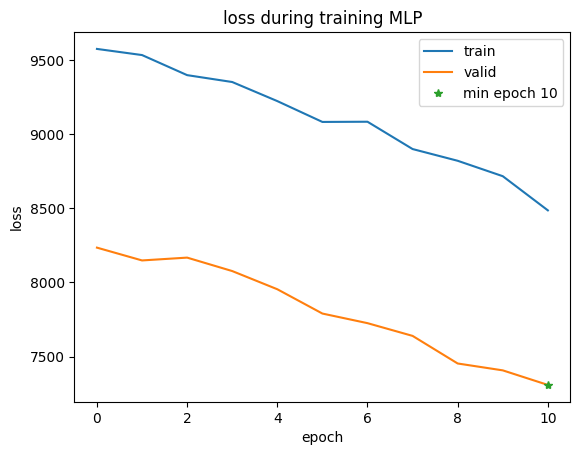

*************** vomiting ***************
TN: 45; FP: 0; FN: 76; TP: 0
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.372  &0.500  &  nan  &0.000  &1.000  &  nan &0.492 &  nan &0.656

Epoch:11 [Train] Loss:8373.741 |  [Valid] Loss: 7153.990	SAVE MODEL: loss drop: 7308.478 -> 7153.990


/Users/albertcao/Desktop/Work/UMich/Codebase/utils.py:328: RuntimeWarning: invalid value encountered in scalar divide
  try: precision = TP / (TP + FP)


Epoch:12 [Train] Loss:8254.460 |  [Valid] Loss: 7000.648	SAVE MODEL: loss drop: 7153.990 -> 7000.648
Epoch:13 [Train] Loss:8051.889 |  [Valid] Loss: 6902.316	SAVE MODEL: loss drop: 7000.648 -> 6902.316
Epoch:14 [Train] Loss:7824.283 |  [Valid] Loss: 6772.321	SAVE MODEL: loss drop: 6902.316 -> 6772.321
Epoch:15 [Train] Loss:7692.381 |  [Valid] Loss: 6613.293	SAVE MODEL: loss drop: 6772.321 -> 6613.293
Epoch:16 [Train] Loss:7502.087 |  [Valid] Loss: 6599.344	SAVE MODEL: loss drop: 6613.293 -> 6599.344
Epoch:17 [Train] Loss:7399.349 |  [Valid] Loss: 6510.063	SAVE MODEL: loss drop: 6599.344 -> 6510.063
Epoch:18 [Train] Loss:7281.916 |  [Valid] Loss: 6453.688	SAVE MODEL: loss drop: 6510.063 -> 6453.688
Epoch:19 [Train] Loss:7105.393 |  [Valid] Loss: 6458.011	EarlyStopping counter: 1 out of 30
Epoch:20 [Train] Loss:7018.839 |  [Valid] Loss: 6431.822	SAVE MODEL: loss drop: 6453.688 -> 6431.822


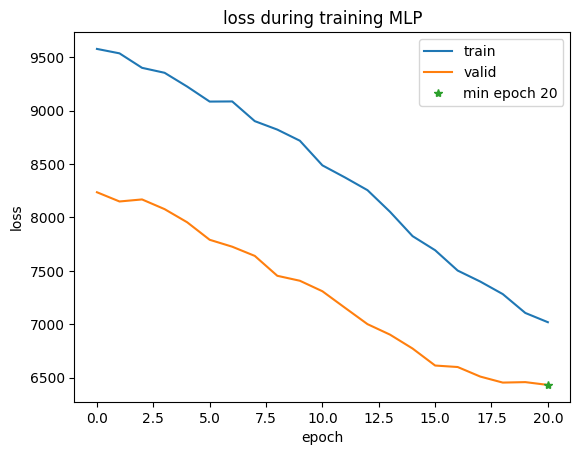

*************** vomiting ***************
TN: 45; FP: 0; FN: 76; TP: 0
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.372  &0.500  &  nan  &0.000  &1.000  &  nan &0.497 &  nan &0.667



/Users/albertcao/Desktop/Work/UMich/Codebase/utils.py:328: RuntimeWarning: invalid value encountered in scalar divide
  try: precision = TP / (TP + FP)


Epoch:21 [Train] Loss:6939.867 |  [Valid] Loss: 6510.591	EarlyStopping counter: 1 out of 30
Epoch:22 [Train] Loss:6894.409 |  [Valid] Loss: 6500.824	EarlyStopping counter: 2 out of 30
Epoch:23 [Train] Loss:6870.375 |  [Valid] Loss: 6585.140	EarlyStopping counter: 3 out of 30
Epoch:24 [Train] Loss:6844.497 |  [Valid] Loss: 6584.538	EarlyStopping counter: 4 out of 30
Epoch:25 [Train] Loss:6792.226 |  [Valid] Loss: 6615.570	EarlyStopping counter: 5 out of 30
Epoch:26 [Train] Loss:6748.169 |  [Valid] Loss: 6631.898	EarlyStopping counter: 6 out of 30
Epoch:27 [Train] Loss:6772.611 |  [Valid] Loss: 6697.448	EarlyStopping counter: 7 out of 30
Epoch:28 [Train] Loss:6799.759 |  [Valid] Loss: 6638.996	EarlyStopping counter: 8 out of 30
Epoch:29 [Train] Loss:6762.620 |  [Valid] Loss: 6623.376	EarlyStopping counter: 9 out of 30
Epoch:30 [Train] Loss:6778.151 |  [Valid] Loss: 6646.632	EarlyStopping counter: 10 out of 30


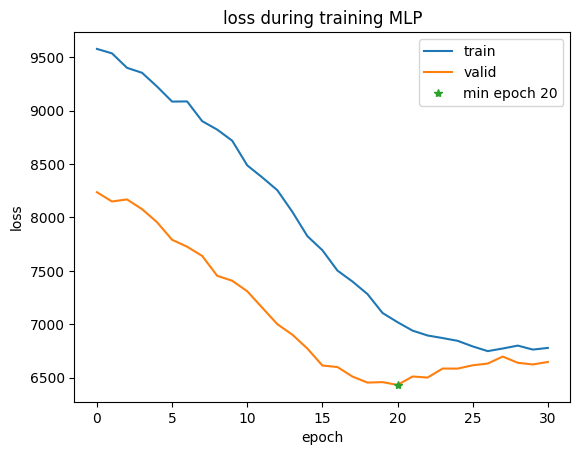

*************** vomiting ***************
TN: 45; FP: 0; FN: 76; TP: 0
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.372  &0.500  &  nan  &0.000  &1.000  &  nan &0.498 &  nan &0.668

Epoch:31 [Train] Loss:6739.084 |  [Valid] Loss: 6634.963	EarlyStopping counter: 11 out of 30


/Users/albertcao/Desktop/Work/UMich/Codebase/utils.py:328: RuntimeWarning: invalid value encountered in scalar divide
  try: precision = TP / (TP + FP)


Epoch:32 [Train] Loss:6717.856 |  [Valid] Loss: 6623.965	EarlyStopping counter: 12 out of 30
Epoch:33 [Train] Loss:6720.777 |  [Valid] Loss: 6629.702	EarlyStopping counter: 13 out of 30
Epoch:34 [Train] Loss:6689.935 |  [Valid] Loss: 6612.024	EarlyStopping counter: 14 out of 30
Epoch:35 [Train] Loss:6693.965 |  [Valid] Loss: 6612.736	EarlyStopping counter: 15 out of 30
Epoch:36 [Train] Loss:6664.697 |  [Valid] Loss: 6581.027	EarlyStopping counter: 16 out of 30
Epoch:37 [Train] Loss:6685.484 |  [Valid] Loss: 6580.313	EarlyStopping counter: 17 out of 30
Epoch:38 [Train] Loss:6679.897 |  [Valid] Loss: 6603.087	EarlyStopping counter: 18 out of 30
Epoch:39 [Train] Loss:6646.511 |  [Valid] Loss: 6586.188	EarlyStopping counter: 19 out of 30
Epoch:40 [Train] Loss:6684.012 |  [Valid] Loss: 6601.534	EarlyStopping counter: 20 out of 30


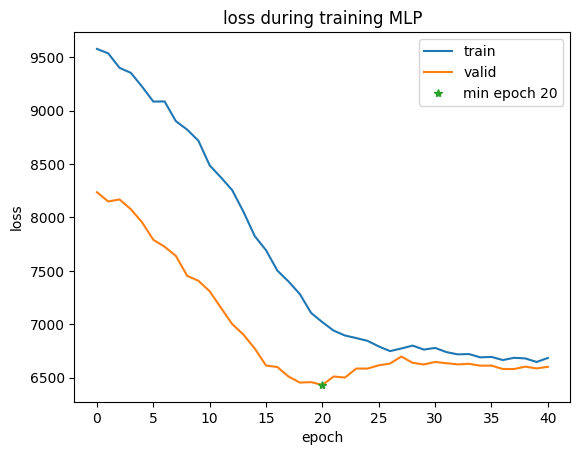

*************** vomiting ***************
TN: 45; FP: 0; FN: 76; TP: 0
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.372  &0.500  &  nan  &0.000  &1.000  &  nan &0.493 &  nan &0.664

Epoch:41 [Train] Loss:6631.719 |  [Valid] Loss: 6558.110	EarlyStopping counter: 21 out of 30


/Users/albertcao/Desktop/Work/UMich/Codebase/utils.py:328: RuntimeWarning: invalid value encountered in scalar divide
  try: precision = TP / (TP + FP)


Epoch:42 [Train] Loss:6614.735 |  [Valid] Loss: 6567.632	EarlyStopping counter: 22 out of 30
Epoch:43 [Train] Loss:6597.322 |  [Valid] Loss: 6587.798	EarlyStopping counter: 23 out of 30
Epoch:44 [Train] Loss:6577.365 |  [Valid] Loss: 6598.877	EarlyStopping counter: 24 out of 30
Epoch:45 [Train] Loss:6621.041 |  [Valid] Loss: 6535.814	EarlyStopping counter: 25 out of 30
Epoch:46 [Train] Loss:6540.865 |  [Valid] Loss: 6514.246	EarlyStopping counter: 26 out of 30
Epoch:47 [Train] Loss:6526.271 |  [Valid] Loss: 6528.291	EarlyStopping counter: 27 out of 30
Epoch:48 [Train] Loss:6569.809 |  [Valid] Loss: 6507.451	EarlyStopping counter: 28 out of 30
Epoch:49 [Train] Loss:6534.115 |  [Valid] Loss: 6507.814	EarlyStopping counter: 29 out of 30
Epoch:50 [Train] Loss:6555.661 |  [Valid] Loss: 6498.996	EarlyStopping counter: 30 out of 30


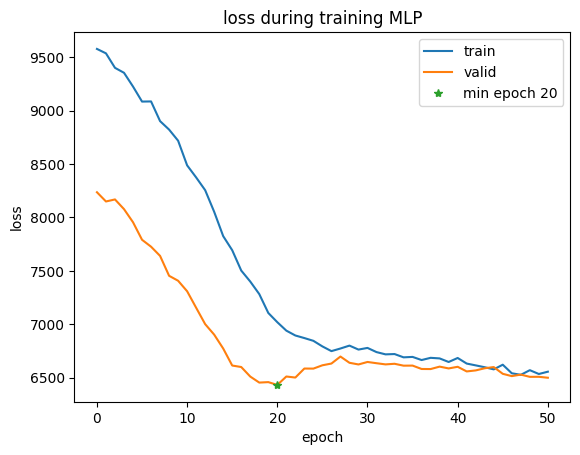

*************** vomiting ***************
TN: 45; FP: 0; FN: 76; TP: 0
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.372  &0.500  &  nan  &0.000  &1.000  &  nan &0.487 &  nan &0.664

early stop
Finished training 



/Users/albertcao/Desktop/Work/UMich/Codebase/utils.py:328: RuntimeWarning: invalid value encountered in scalar divide
  try: precision = TP / (TP + FP)


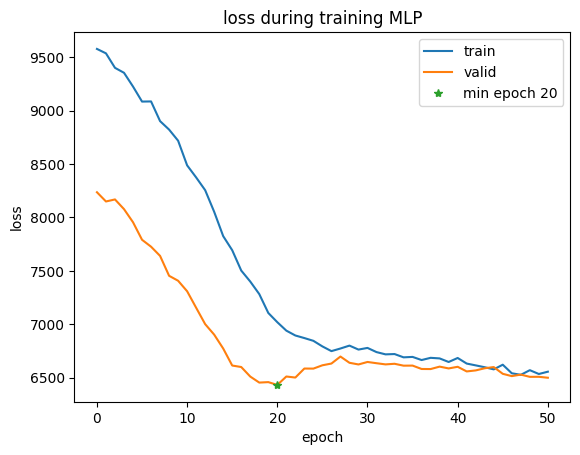

load model from path:  test.pt
***************  ***************
TN: 46; FP: 0; FN: 61; TP: 0
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.430  &0.500  &  nan  &0.000  &1.000  &  nan &0.488 &  nan &0.610


/Users/albertcao/Desktop/Work/UMich/Codebase/utils.py:328: RuntimeWarning: invalid value encountered in scalar divide
  try: precision = TP / (TP + FP)


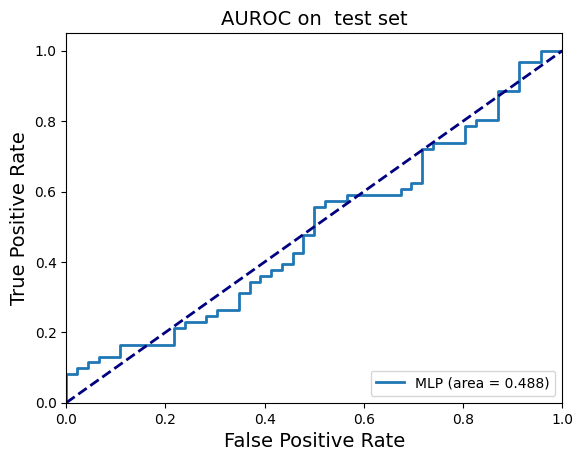

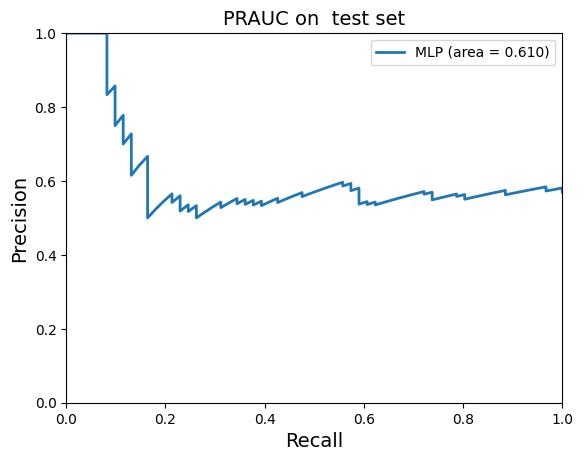


TN: 46; FP: 0; FN: 61; TP: 0
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.430  &0.500  &  nan  &0.000  &1.000  &  nan &0.488 &  nan &0.610
Fold 2
-------


/Users/albertcao/Desktop/Work/UMich/Codebase/utils.py:328: RuntimeWarning: invalid value encountered in scalar divide
  try: precision = TP / (TP + FP)


Epoch:0 [Train] Loss:10242.597 |  [Valid] Loss: 10432.637	EarlyStopping counter: 31 out of 30
SAVE MODEL: loss drop: inf -> 10432.637
early stop
Finished training 



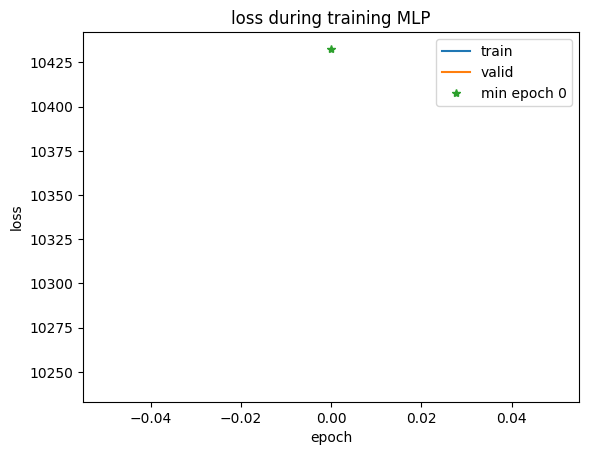

load model from path:  test.pt
***************  ***************
TN: 38; FP: 8; FN: 45; TP: 16
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.505  &0.544  &0.667  &0.262  &0.826  &0.376 &0.536 &0.105 &0.588


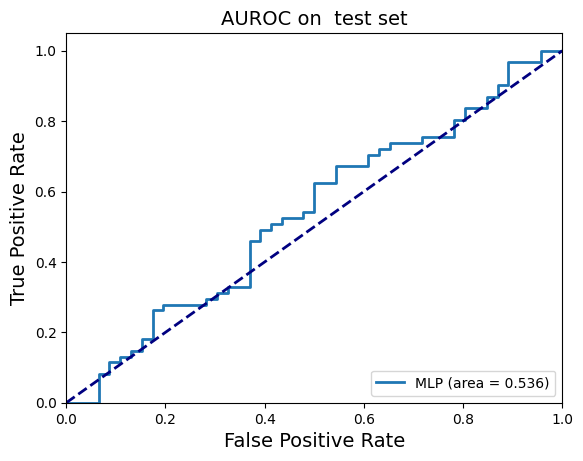

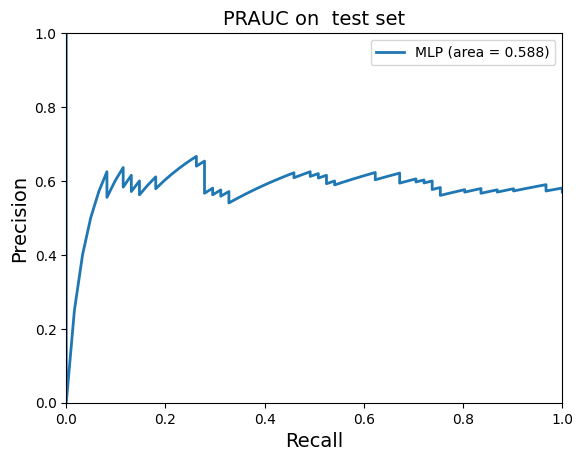


TN: 38; FP: 8; FN: 45; TP: 16
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.505  &0.544  &0.667  &0.262  &0.826  &0.376 &0.536 &0.105 &0.588
Fold 3
-------
Epoch:0 [Train] Loss:10812.329 |  [Valid] Loss: 10580.510	EarlyStopping counter: 32 out of 30
SAVE MODEL: loss drop: inf -> 10580.510
early stop
Finished training 



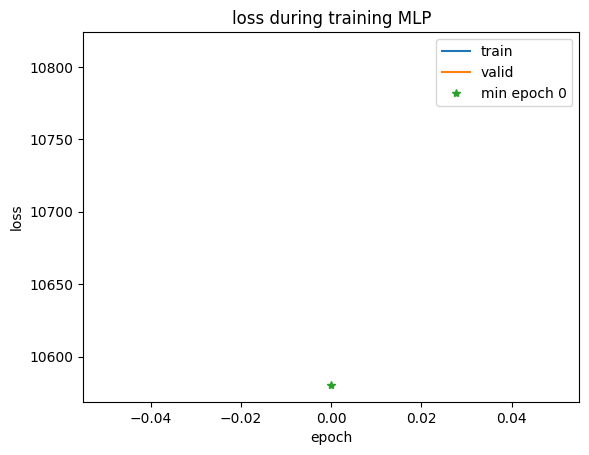

load model from path:  test.pt
***************  ***************
TN: 0; FP: 46; FN: 0; TP: 61
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.570  &0.500  &0.570  &1.000  &0.000  &0.726 &0.504 &  nan &0.583


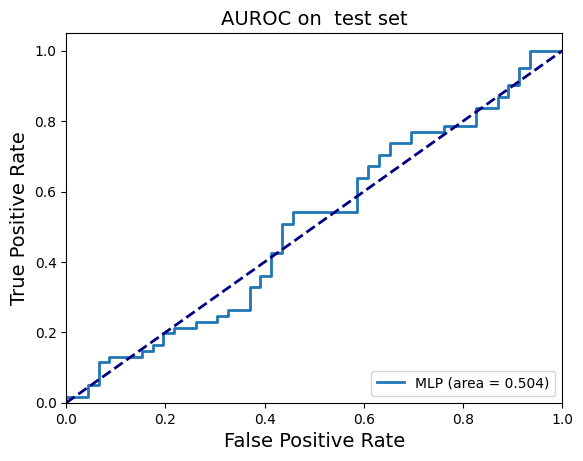

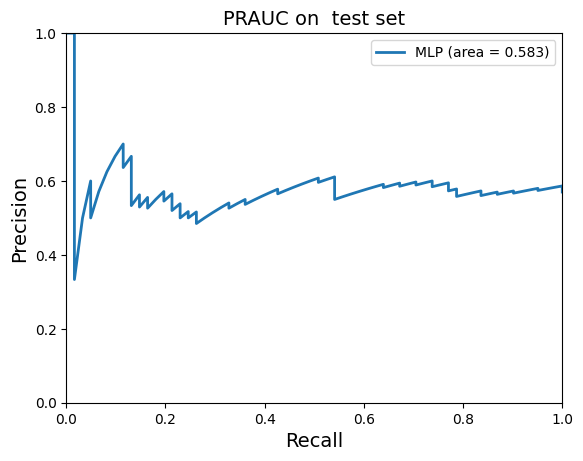


TN: 0; FP: 46; FN: 0; TP: 61
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.570  &0.500  &0.570  &1.000  &0.000  &0.726 &0.504 &  nan &0.583
Fold 4
-------
Epoch:0 [Train] Loss:8826.370 |  [Valid] Loss: 8927.646	EarlyStopping counter: 33 out of 30
SAVE MODEL: loss drop: inf -> 8927.646
early stop
Finished training 



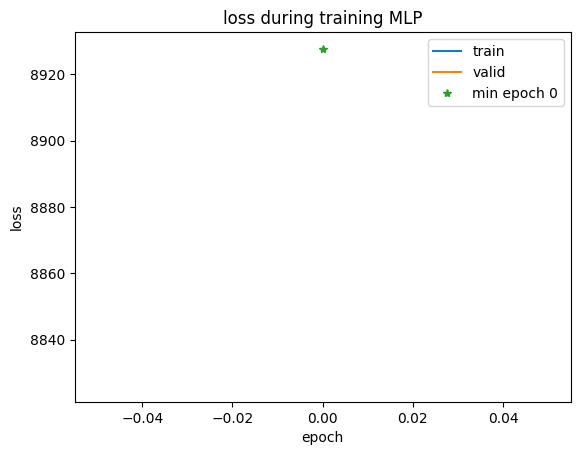

load model from path:  test.pt
***************  ***************
TN: 46; FP: 0; FN: 61; TP: 0
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.430  &0.500  &  nan  &0.000  &1.000  &  nan &0.470 &  nan &0.550


/Users/albertcao/Desktop/Work/UMich/Codebase/utils.py:328: RuntimeWarning: invalid value encountered in scalar divide
  try: precision = TP / (TP + FP)


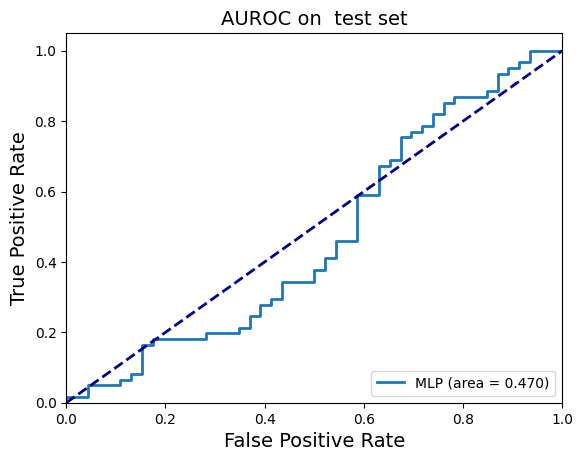

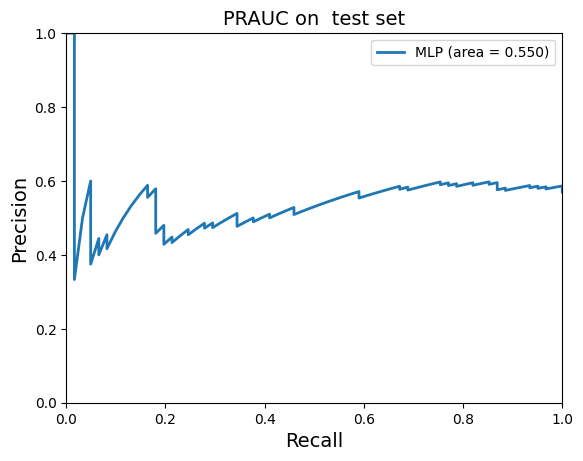


TN: 46; FP: 0; FN: 61; TP: 0
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.430  &0.500  &  nan  &0.000  &1.000  &  nan &0.470 &  nan &0.550
Fold 5
-------


/Users/albertcao/Desktop/Work/UMich/Codebase/utils.py:328: RuntimeWarning: invalid value encountered in scalar divide
  try: precision = TP / (TP + FP)


Epoch:0 [Train] Loss:8470.856 |  [Valid] Loss: 8474.247	EarlyStopping counter: 34 out of 30
SAVE MODEL: loss drop: inf -> 8474.247
early stop
Finished training 



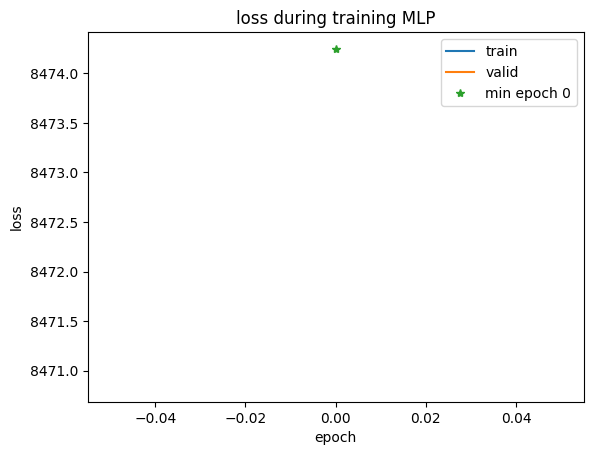

load model from path:  test.pt
***************  ***************
TN: 0; FP: 46; FN: 0; TP: 61
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.570  &0.500  &0.570  &1.000  &0.000  &0.726 &0.467 &  nan &0.561


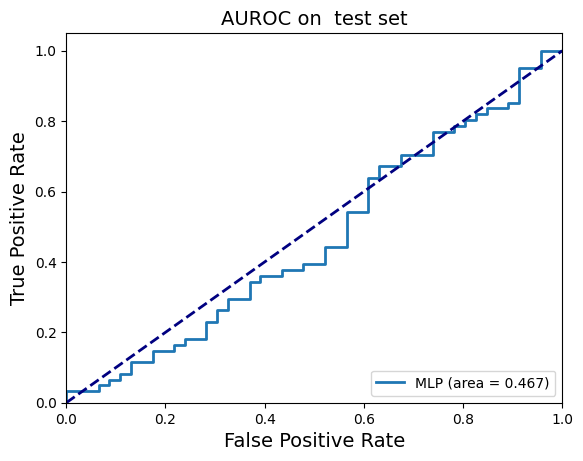

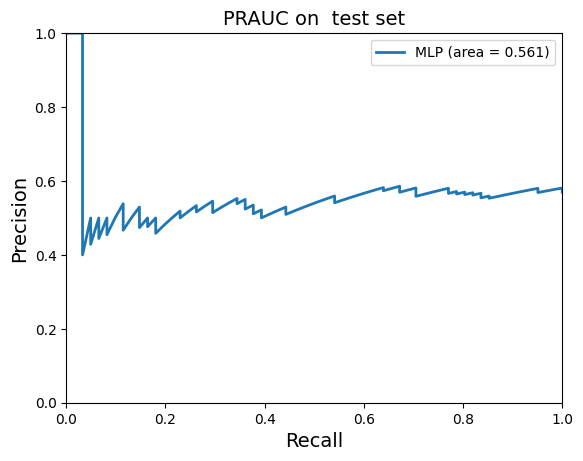


TN: 0; FP: 46; FN: 0; TP: 61
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.570  &0.500  &0.570  &1.000  &0.000  &0.726 &0.467 &  nan &0.561


In [10]:
"modify weight_loss: list, the higher the num, more penalize if predict label 0 wrong"
from sklearn.model_selection import KFold
from ml_utils import *

k_folds = 5

kf = KFold(n_splits=k_folds, shuffle=True)

train_dataset = tox_dataset(train_df, ae_name)
test_loader = DataLoader(tox_dataset(test_df, ae_name), **params)

weight_losses = [7.0, 8.0, 8.0, 7.0, 6.0]

results = {
    "acc": [],
    "precision": [],
    "recall": [],
    "F1": [],
    "TP": [],
    "TN": [],
    "FP": [],
    "FN": [],
    "cohen": []
}
for fold, (train_idx, val_idx) in enumerate(kf.split(train_dataset)):
    print(f"Fold {fold + 1}")
    print("-------")

    stopper = EarlyStopping(mode='lower', patience=patience)
    train_loader = DataLoader(
        train_dataset,
        batch_size=64,
        sampler=torch.utils.data.SubsetRandomSampler(train_idx),
    )
    val_loader = DataLoader(
        train_dataset,
        batch_size=64,
        sampler=torch.utils.data.SubsetRandomSampler(val_idx),
    )

    model = Classifier(in_dim, h_dims)
    if torch.cuda.is_available(): model = model.cuda()
    optimizer = optim.AdamW(params=model.parameters(), lr=lr, weight_decay=wd)

    train(model, train_loader, val_loader, weight_loss=weight_losses[fold], optimizer=optimizer, ae_name=ae_name)
    _, probs, label = eval(model, test_loader, model_path)
    preds = get_preds(0.5, probs)
    cls_results = evaluate(label, preds, probs)
    # [ACCURACY, weighted_accuracy, precision, SE, SP, F1, AUC, MCC, AP]
    for key in cls_results:
        results[key].append(cls_results[key])

for key in results:
    results[key].append(np.mean(results[key]))

results_df = pd.DataFrame.from_dict(results)
results_df.to_csv(f"{ae_name}_results.csv", index=False)
